# Clustering

Clustering is the classification of data into different groups, these groups are called clusters, which share significant similarity with other data points within the same cluster. Sounds an awful lot like multi-class logistic regression.... what's the difference ?

Clustering falls into the category of unsupervised learning, a subfield of machine learning where the ground truth labels are not available to us in real-world applications.

The main idea of clustering is that you want to optimize inter-cluster similarity and intra-cluster similarity. What kind of values do we want for inter and intra cluster similarity ?

We will cover 5 main topics this week :

- Definition and Model Description

- Assumptions and Considerations

- Suitable Research Question

- Case study

- Data Pipeline Implementation

Images were pulled from [this article](https://towardsdatascience.com/unsupervised-machine-learning-clustering-analysis-d40f2b34ae7e).

# Definition and Model Description

We will discuss some of the most common clustering algorithms available :

- K-Means

- Hierarchical 

- Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

- Gaussian Clustering Model 




## K-means : 

K-Means algorithms is one of the most popular clustering algorithms out there, they are very easy to implement and are very efficient. 

It calculates the similarity, i.e. distance using the Euclidian distance (l2 norm). 

$$d(x, y)^2 = \sum_{j=1}^m (x_j - y_j)^2 = ||x-y||^2$$

But struggles to identify classes when dealing with groups that do not have a spherical distribution shape.

The cluster inertia, a.k.a. sum of squared errors (SSE), is defined as :

$$SSE = \sum_{i=1}^n\sum_{j=1}^k w^{(i,j)}||x^{(i)}-\mu^{(j)}||^2$$, where :

$\mu^{(j)}$ is the centroid for cluster j, and $w^{(i,j)}$ is 1 if the sample $x^{(i)}$ is in cluster j and 0 otherwise. So the K-means clustering algorithm will try to minimize the cluster inertia factor.

The K-Means algorithms finds and group in classes the data points that have high similarity between them. The algorithm defines similarity as the opposite of the distance between data points. The closer two data points are, the more similar and more likely to belong to the same cluster.

### K-Means Algorithm Steps

Step-1: Select the value of K, to decide the number of clusters to be formed.

Step-2: Select random K points which will act as centroids.

Step-3: Assign each data point, based on their distance from the randomly selected points (Centroid), to the nearest/closest centroid which will form the predefined clusters.

Step-4: Compute the new centroid of each cluster.

Step-5: Repeat step no.3, which reassign each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to Step 7.

Step-7: FINISH

### Advantages :

- Easy to implement and interpret

- Very cheap, i.e.fast computation


### Disadvantages :

- Remember that with k-means clustering due to the random initialization of the centroids the output for any fixed training set won’t be always the same.

- As mentioned before, due to the nature of Euclidean distance, it is not a suitable algorithm when dealing with clusters that adopt non-spherical shapes.

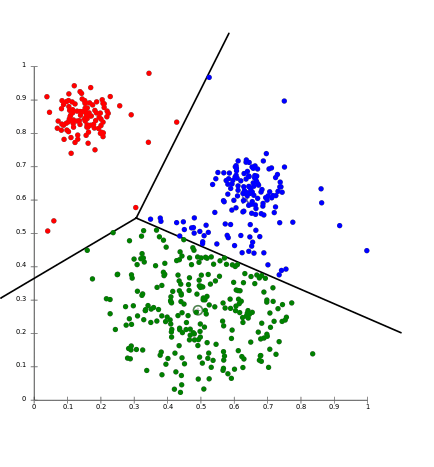

- Features should be measured on the same scale, it may be necessary to use z-score standardization or max-min scaling.

- If there is categorical data create dummy variables (one-hot encoding).

- The minibatch method is very useful when there is a large number of columns, however, it is less accurate.

- Must chose the right number of clusters.... but how ?

    - Field knowledge
    
    - Elbow method
    
    

### Elbow method :

This is a method used to determine the correct number of clusters that are present in the data. It is a simple metrics used to messure performance of the algorithm based on the number of clusters being used :

$$\% Variance = \frac{Variance * between * groups}{Total * variance}$$



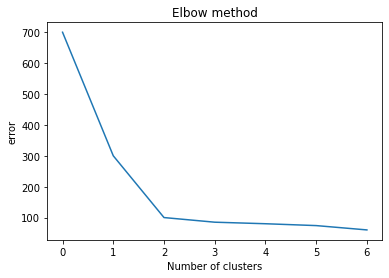

In [1]:
import matplotlib.pyplot as plt

points = [700, 300, 100, 85, 80, 74, 60]
plt.plot(points)
plt.xlabel('Number of clusters')
plt.ylabel('error')
plt.title('Elbow method')
plt.show()

## Hierarchical clustering

Hierarchichal clustering is an alternative to prototyope-based clustering algorithms. One of the main advantages of Hierarchichal clustering is that we don't need to specify the number of clusters. We can visualize the clustering using dendograms.

### Algorithm Steps :

There are two approaches to this type of clustering: Aglomerative and divisive.

- Divisive: This is a top down approach, it starts with all data points in a single cluster. Then, it splits the cluster iteratively into smaller ones until each one of them contains only one sample.

- Agglomerative: This is a bottom up approach, it starts with each sample being a different cluster and then merges the clusters that are closer to each other until there is only one cluster.


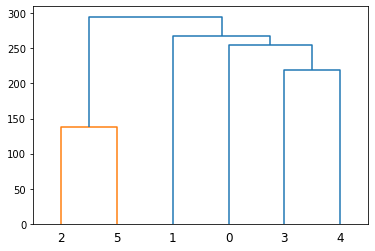

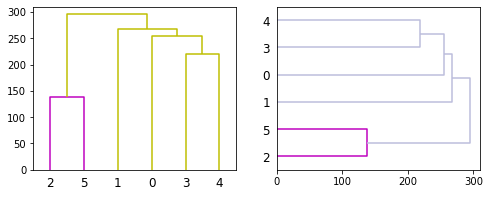

In [2]:
# Example from the documentation :

from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import numpy as np

#Data
ytdist = np.array([662., 877., 255., 412., 996., 295., 468., 268.,
                    400., 754., 564., 138., 219., 869., 669.])

#Create hierarchical clustering using single linkage :
Z = hierarchy.linkage(ytdist, 'single')
plt.figure()

#Visualization :
dn = hierarchy.dendrogram(Z)


hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

#Vertical plot :
dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y',
                            orientation='top')

#Horizontal plot :
dn2 = hierarchy.dendrogram(Z, ax=axes[1],
                            above_threshold_color='#bcbddc',
                            orientation='right')
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.show()

These cluster are formed using one of two approaches :

- Single linkage : assumes that each sample point is a cluster, then computes the distances between the most similar members for each pair of clusters and merges the two clusters with the smallest distance.

- Complete linkage : compares the most dissimilar data points of a pair of clusters and performs the merge based on the smallest distance.


### Advantages :

- The Dendogram representations are rich in information about the data

- Extremely useful when the dataset contains real hierarchichal relationships

### Disadvantages :

- It is very sensitive to outliers which impacts the model performance significantly

- Very expensive, i.e. computationally intensive

## DBSCAN

This clustering technique that works well with data that contains noise and is helpful in identifying outliers. 

### Algorithm Steps :

For this algorithm we must identify the number of points that cons and a given radius  It is based on a number of points with a specified radius ε and there is a special label assigned to each datapoint. The process of assigning this label is the following:

1. Identify the number of points that constitute a cluster and the maximum distance $\epsilon$

2. Check if the initial point containg the minimum number of points (MinPts) which are less than the distance $\epsilon$ from it. If there is at least MinPts number of points that fall in the $\epsilon$ radius, then the point is considered a core point.

3. Check if any of the points in the neighborhood of the core point also contain MinPts in their respective neighborhood. If they do, they are also core points. If they don't they are border points.

4. Any point that lies inside of the distance $\epsilon$ from a core point, but does not have MinPts in its neighborhood is considered a border point

5. Repeat from step 1. 

6. Every other point is considered to be noise

### Advantages :

- Don't need to specify the number of clusters

- Shape and size of clusters is very flexible

- Very useful to identify and deal with noisy data/outliers

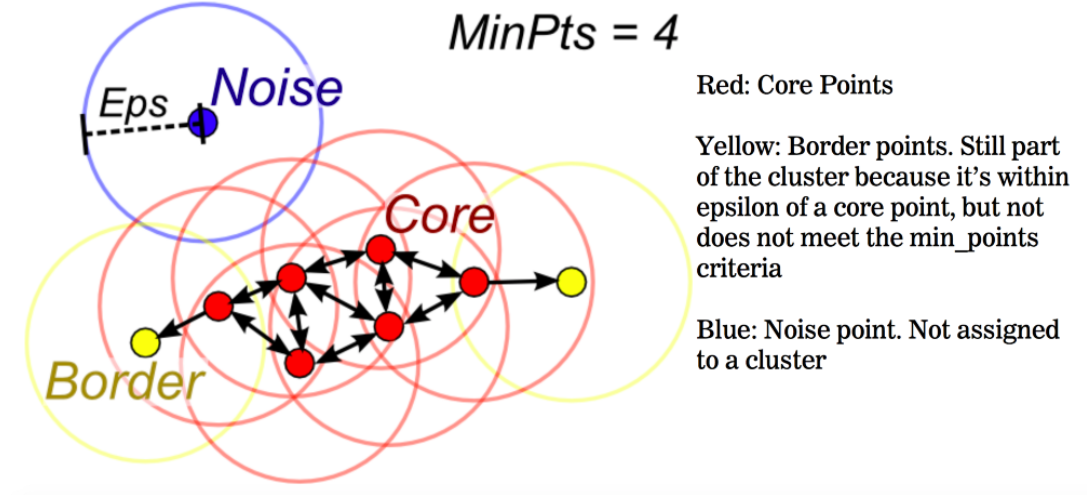

### Disadvantages :

- Border points that are reachable by two clusters are difficult to deal with

- Clusters of varying densities are difficult to find

## Gaussian Mixture Models (GMM)

Gaussian Mixture Models are probabilistic models which assume that all samples are generated from a mix of a certain number of Gaussian distributions with unkown parameters. This uses soft clustering, meaning that every data point belongs to every cluster with some score between 0 and 1 (a probability).

It is a generalization of K-Means clustering which takes into account information about the covariance structure of the data as well as the centers of the latent Gaussians.

### Algorithm Steps :

This is an expectation-maximization algorithm :

1. Initialize K Gaussian distributions (mean and variance). Can be approximated by applying K-Means.

2. Expectation step : Soft cluster the data where all datapoints are assigned to every cluster with their respective level of membership

3. Maximization : Re-estimate the gaussians, expectations are checked and then are used to calculate new parameters for the gaussians (re-calculate the mean and variance)

4. Evaluate log-likelihood to check for convergence. The higher it is (closer to 0), the more probable is that the mixture of the model is likely to fit the dataset

5. Rinse and repeat from step 2 until the model converges

### Advantages :

- This is a soft-clustering method. This characteristic makes it the fastest algorithm to learn mixture models. (Quick reminder : mixture model is a probabilistic model used to represent the presence of subpopulations within an overall population. It does not require that an observed data set identify the sub-population to which an individual observation belongs)

- There is high flexibility in the number and shape of the clusters.


### Disadvantages :

- Very sensitive to the initial values

- May converge to a local minimum

- Needs lots of data points per mixture otherwise the algorithm diverges and finds solutions with infinite likelihood. Need regularization of the covariances between the data points

## Assumptions when dealing with a clustering :

- Outcome variable must be categorical

- Only meaningful variables should be included. Dimensionaility reduction techniques like PCA can help performance.

## Clustering validation (k-means, hierarchical)

Since clustering is an unsupervised learning we rarely have the labels for the different groups in our data. To analyze the performance of our clustering algorithm we will use an internal indices technique known as Slihouette Coefficient. The Silhouette coefficient has values that range from [-1,1] with the best value being 1 and the worst value being -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

The Silhouette Ceoffiecient is defined as follows :

$$S_i = \frac{b_i - a_i}{MAX(b_i, a_i)}$$, where :

- $a_i = \frac{1}{|C_i|-1}\sum_{j\epsilon C_i, i \neq j} d(i, j)$, where : 
    
    - $C_i$ is cluster i
    - $d(i,j)$ is the distance between point i and point j
    - this is the average distance between point i and all other points in cluster i, which measures how well point i is assigned to its cluster. The smaller the value the better the assignment.

- $b_i = min_{k \neq i} \frac{1}{|C_k|}\sum_{j\epsilon C_k}d(i,j)$, where :

    - $C_k$ is any of the other clusters in the data
    - smallest distance between i and all points in any of the other clusters in the data, of which i is not a member of. This is a dissimilarity measure between the cluster i is currently in and the next best cluster to classify the point i as.

It is only suitable for certain algorithms such as K-Means and hierarchical clustering. It is not suitable to work with DBSCAN, for which DBCV should be used instead to handle the arbitrary shape of the clusters. A package for DBCV can be installed from [this Github](https://github.com/christopherjenness/DBCV).

## Suitable research question :

Clustering is a valid method only if : 

- The outcome variable is a categorical variable (1/0, yes/no, approved/denied, group1/group2/group3 etc...)

- Independent variables should all be on the same scale (applies to some algorithms)

## Case study :

Let's look at an example of k-means clustering using sklearn. Example found [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py)

In [3]:
#Import the required packages :
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


#Create some dummy data :
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

#Check our data :
X

array([[-5.19811282e+00,  6.41869316e-01],
       [-5.75229538e+00,  4.18627111e-01],
       [-1.08448984e+01, -7.55352273e+00],
       ...,
       [ 1.36105255e+00, -9.07491863e-01],
       [-3.54141108e-01,  7.12241630e-01],
       [ 1.88577252e+00,  1.41185693e-03]])

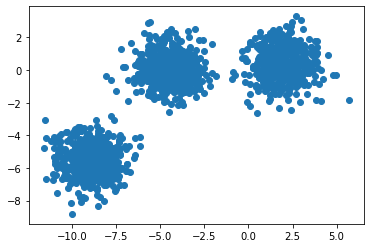

In [4]:
#Let's plot the data : 
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Text(0.5, 1.0, 'Incorrect Number of Clusters')

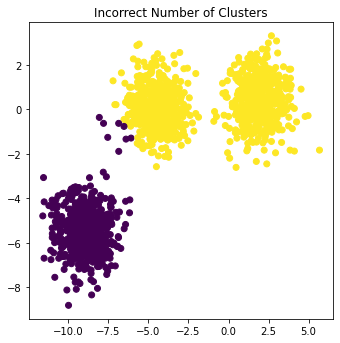

In [5]:
plt.figure(figsize=(12, 12))

# Let's predict the clusters with too few clusters :
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Clusters")

Text(0.5, 1.0, 'Anisotropicly Distributed Blobs')

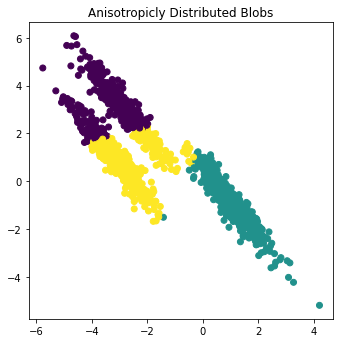

In [6]:
# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.figure(figsize=(12, 12))
plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

Text(0.5, 1.0, 'Unequal Variance')

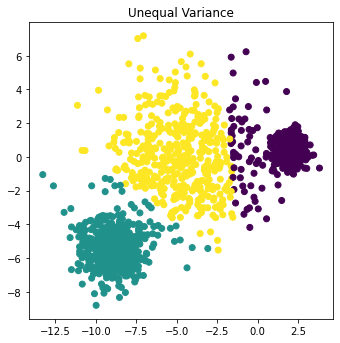

In [7]:
# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.figure(figsize=(12, 12))
plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

Text(0.5, 1.0, 'Unevenly Sized Blobs')

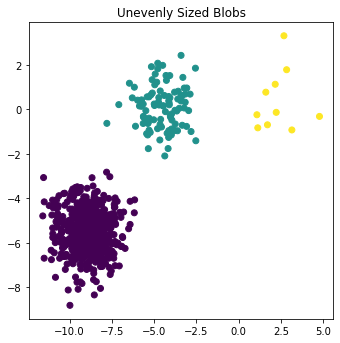

In [8]:
# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.figure(figsize=(12, 12))
plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

## K-Means clustering will be your homework, and you will not be using 

# Hyper-parameter tunning

Hyper-parameters are parameters that are not directly learnt via estimators, i.e. regression model, classifier, etc... These are the arguments passed to the constructors of the estimator classes (in this class we trusted the default values since we always created our regression model using LinearRegression() <- no paramters were passed to the constructor). Typical examples include C, kernel and gamma values for SVM, alpha values for Lasso regression, etc...

It is recommended to search over the hyper-parameter space for the best Cross-validation score : evaluating estimator performance score.

Parameters passed to the constructor of an estimator may be optimized this way. To get a list of parameters and current values use: estimator.get_params()

A hyper-parameter search consists of:
- estimator, i.e. regressor/classifier such as sklearn.svm.SVC()
- parameter space, i.e. possible values possible for the parameter
- method for searching/sampling candidates
- cross-validation scheme
- score function

Scikit-learn has two generic approaches for hyper-parameter optimization :
- GridSearchCV : exhaustively considers all parameter combinations for the given values
- RandomizedSearchCV : samples a given number of candidates from a parameter space with a specified distribution

Note : these hyper-parameter tunning strategies are also available in Tensorflow which implements sklearn wrappers to enable their use.

## Grid search :

Grid Search will exhaustively generate candidates from a grid of paramter values.

The parameter grid is a list of dictionaries that the define the list of parameters we will be using to look for the best set of hyper-parameters.

In [9]:
#List of dictionaries where the key is the parameter and the value is a list of values you want the model to 
#use in the constructor of the estimator

#This param_grid has 12 total models to try
param_grid = [{'C':[1, 5, 10, 20], 'kernel': ['linear']}, #4 combinations : 4 values for C
             {'C': [1, 5, 10, 20], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}] #8 combinations : 4 values for
                                                                                 #C and 2 for gamma

In [10]:
#Import the necessary packages :
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC

#Load sample data :
numberData = datasets.load_digits()

#Extract X and y for model creation/prediction :
n_samples = len(numberData.images)
X = numberData.images.reshape((n_samples, -1))
y = numberData.target

# Split data into train/test 70-30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

#Perform GridSearch using the tuned_parameter list. It is important to note that this will return a model, not
#just any model though, the "best model", i.e. model that performed best based on the scoring function (in this
#case it is the f1-macro) given a certain set of hyper-parameters.
bestModel = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='f1_macro')

#Since we got a model, we can fit it onto our data :
bestModel.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(C=1),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             scoring='f1_macro')

In [11]:
#We can get the best hyper-parameters for our model :
bestModel.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [12]:
#We can take a closer look at the resutls from the GridSearch :
bestModel.cv_results_

{'mean_fit_time': array([0.03437414, 0.02811937, 0.03435645, 0.01897302, 0.03482723,
        0.01886325, 0.03748393, 0.01874557, 0.01250386, 0.01249628,
        0.01249695, 0.01249638]),
 'std_fit_time': array([0.00624484, 0.00623099, 0.00625309, 0.00671882, 0.0036109 ,
        0.00648878, 0.00764844, 0.00624924, 0.00625194, 0.00624814,
        0.0062485 , 0.00624822]),
 'mean_score_time': array([0.01561432, 0.0156271 , 0.01875682, 0.00847197, 0.01459813,
        0.00727   , 0.01562943, 0.00937295, 0.00624161, 0.00312519,
        0.00624886, 0.00624852]),
 'std_score_time': array([1.29207913e-05, 1.29225509e-05, 6.24576867e-03, 7.11438993e-03,
        8.75815741e-04, 7.08055127e-03, 1.29394312e-05, 7.65298140e-03,
        7.64440022e-03, 6.25038147e-03, 7.65325385e-03, 7.65284506e-03]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100, 1000, 1000, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False,

In [13]:
#... or more simply we can look at the parameters for the model and the mean test score :
for param, score in zip(bestModel.cv_results_['params'], bestModel.cv_results_['mean_test_score']):
    print(param, score)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'} 0.9885476590049984
{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'} 0.9689722789621527
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'} 0.9910484962097925
{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'} 0.9861825355292773
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'} 0.9910484962097925
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'} 0.9876820841389862
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'} 0.9910484962097925
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'} 0.9876820841389862
{'C': 1, 'kernel': 'linear'} 0.9834723224831329
{'C': 10, 'kernel': 'linear'} 0.9834723224831329
{'C': 100, 'kernel': 'linear'} 0.9834723224831329
{'C': 1000, 'kernel': 'linear'} 0.9834723224831329


In [14]:
#Since we got a model that we can fit, we can also use it to predict and we can look at the performance of 
#the model on the test data :
y_pred = bestModel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        52
           2       1.00      0.98      0.99        53
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        48
           5       0.98      0.96      0.97        57
           6       0.98      1.00      0.99        60
           7       0.98      1.00      0.99        53
           8       1.00      0.98      0.99        61
           9       0.98      0.98      0.98        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



## Randomized search :

GridSearch is one of the most popular methods for hyper-parameter tunning, Randomized search has gained popularity due in part to the fact that for high dimensional problems not all dimensions are equally important, only a few dimensions are and Randomized search has been shown to be better able to optimize hyper-parameters in those conditions. This has two main benefits over an exhaustive search:

- One can chose the number of parameters and possible values

- Adding parameters that don't influence the performance does not decrease efficiency

Hyper-parameter space is defined very similar to GridSearch, using a dictionary. As mentioned above, a computation budget, i.e. the number of sampled candidates/iterations can be specified using the n_iter parameter. 

For each parameter, we can specify a distribution over possible values or a list of discrete choices.

In [15]:
import scipy
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

#For C we specify a normal distribution and for gamma we specify an exponential distribution. For kernel and 
#class_weight we specify a list of finite options :
params = {'C': scipy.stats.norm(), 'gamma': scipy.stats.expon(scale=.1),
  'kernel': ['rbf'], 'class_weight':['balanced', None]}

#We perform our Randomized search with the list of parameters above :
bestModelRand = RandomizedSearchCV(SVC(), params, cv=5,
                       scoring='f1_macro')

#We fit our model onto the training data (digit data, same as for GridSearch) :
bestModelRand.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017765571B50>,
                                        'class_weight': ['balanced', None],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001776556DEB0>,
                                        'kernel': ['rbf']},
                   scoring='f1_macro')

In [16]:
#We can get the best hyper-parameters for our model :
bestModelRand.best_params_


# This is what we got with GridSearch :
# {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

{'C': 1.4364043200766048,
 'class_weight': 'balanced',
 'gamma': 0.07200825704086292,
 'kernel': 'rbf'}

In [17]:
#We can take a closer look at the resutls from the GridSearch :
bestModelRand.cv_results_

{'mean_fit_time': array([0.00041442, 0.09363365, 0.09511065, 0.00039864, 0.        ,
        0.00040531, 0.09122934, 0.        , 0.        , 0.11147995]),
 'std_fit_time': array([0.00050757, 0.00022267, 0.00275731, 0.00048823, 0.        ,
        0.00049654, 0.00500317, 0.        , 0.        , 0.00426319]),
 'mean_score_time': array([0.        , 0.03294125, 0.02461548, 0.        , 0.        ,
        0.        , 0.03123989, 0.        , 0.        , 0.02811937]),
 'std_score_time': array([0.00000000e+00, 3.39358111e-03, 7.37578802e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.02308245e-05, 0.00000000e+00,
        0.00000000e+00, 6.24873657e-03]),
 'param_C': masked_array(data=[-0.4276376670174573, 0.5416721827797394,
                    0.7503159868012608, -0.2037566180604985,
                    -1.5835444317286562, -0.3646853277795021,
                    0.17798568435098436, -0.08224667088211933,
                    -1.5668843417888165, 1.4364043200766048],
          

In [18]:
#... or more simply we can look at the parameters for the model and the mean test score :
for param, score in zip(bestModelRand.cv_results_['params'], bestModelRand.cv_results_['mean_test_score']):
    print(param, score)
    
#We notice that here our model performed quite poorly when compared to the performance of the model we got
#using GridSearch. This does not mean that Randomized search is bad, it means that the distributions that we
#provided for the model (normal and exponential) were not right.

{'C': -0.4276376670174573, 'class_weight': 'balanced', 'gamma': 0.1256738145575275, 'kernel': 'rbf'} nan
{'C': 0.5416721827797394, 'class_weight': 'balanced', 'gamma': 0.03947759203683886, 'kernel': 'rbf'} 0.020283483677834675
{'C': 0.7503159868012608, 'class_weight': 'balanced', 'gamma': 0.024453934356486202, 'kernel': 'rbf'} 0.035310640801127044
{'C': -0.2037566180604985, 'class_weight': None, 'gamma': 0.07065682423306541, 'kernel': 'rbf'} nan
{'C': -1.5835444317286562, 'class_weight': None, 'gamma': 0.033165130529699174, 'kernel': 'rbf'} nan
{'C': -0.3646853277795021, 'class_weight': None, 'gamma': 0.026803733375953022, 'kernel': 'rbf'} nan
{'C': 0.17798568435098436, 'class_weight': 'balanced', 'gamma': 0.10697190948713198, 'kernel': 'rbf'} 0.01910889469656562
{'C': -0.08224667088211933, 'class_weight': 'balanced', 'gamma': 0.22330250450116285, 'kernel': 'rbf'} nan
{'C': -1.5668843417888165, 'class_weight': 'balanced', 'gamma': 0.0770308108400755, 'kernel': 'rbf'} nan
{'C': 1.436404

In [19]:
#Since we got a model that we can fit, we can also use it to predict and we can look at the performance of 
#the model on the test data :
y_pred = bestModelRand.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.18      0.30        45
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00        54
           4       0.09      1.00      0.17        48
           5       0.00      0.00      0.00        57
           6       0.00      0.00      0.00        60
           7       0.00      0.00      0.00        53
           8       0.00      0.00      0.00        61
           9       0.00      0.00      0.00        57

    accuracy                           0.10       540
   macro avg       0.11      0.12      0.05       540
weighted avg       0.09      0.10      0.04       540

